# Face similarity score

## Game plan:
<ol>
  <li>Take in 2 lists of face-pictures</li>
  <li>get face locations and encodings</li>
  <li>cluster faces only</li>
  <li>get distance between centres of clusters</li>
  <li>display clusters and similarity score</li>
</ol>

### Importing necessary libraries

In [2]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=b0589fdb4ba92a8c7e183086fb3ce35037e134ae782b18352eed93a81c20ef98
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [244]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import distance
import os
import face_recognition
import pickle
from sklearn.cluster import DBSCAN
from imutils import build_montages
from google.colab.patches import cv2_imshow

### Setting up google drive

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### Getting 2 lists of face-pictures

In [159]:
face_1 = []
face_2 = []
path_1 = input('Enter the path to folder where one set of pictures are :')
path_2= input('Enter the path to folder where other set of pictures are :')
for filename in os.listdir(path_1):
    if filename.endswith('jpg'):
      face_1.append(path_1+'/'+filename)
for filename in os.listdir(path_2):
    if filename.endswith('jpg'):
      face_2.append(path_2 + '/' + filename)

Enter the path to folder where one set of pictures are :/content/gdrive/My Drive/Data/Maheak
Enter the path to folder where other set of pictures are :/content/gdrive/My Drive/Data/Vishwang


### function to show an image properly

In [6]:
def show_picture(img):
  img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img_rgb)

### getting face_locations

In [191]:
def get_normalized(img):
  yuv_img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
  yuv_img[:,:,0] = cv2.equalizeHist(yuv_img[:,:,0])
  final_img = cv2.cvtColor(yuv_img,cv2.COLOR_YUV2RGB)
  norm_image = np.zeros(img.shape)
  norm_img = cv2.normalize(final_img,  norm_image, 0, 255, cv2.NORM_MINMAX)
  return norm_img

In [213]:
data=[]
model = Xception(weights="imagenet",include_top=False)
#getting encodings for first set of images
for (i,imagePath) in enumerate(face_1):
  print('Processing image {}/{}:'.format(i,len(face_1)))
  print(imagePath)
  img = cv2.imread(imagePath)
  rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  rgb = get_normalized(rgb)
  boxes = face_recognition.face_locations(rgb)
  encodings = face_recognition.face_encodings(rgb, boxes)
  d = [{"imagePath": imagePath, "loc": box, "encoding": enc} 
       for (box, enc) in zip(boxes, encodings)]
       #as there can be multiple faces in an image, 
       #unzipping them all and adding the encodings
  data.extend(d)
#getting encodings for second set of images
for (i,imagePath) in enumerate(face_2):
  print('Processing image {}/{}:'.format((i+1),len(face_2)))
  print(imagePath)
  img = cv2.imread(imagePath)
  rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  rgb = get_normalized(rgb)
  boxes = face_recognition.face_locations(rgb)
  encodings = face_recognition.face_encodings(rgb, boxes)
  d = [{"imagePath": imagePath, "loc": box, "encoding": enc} 
       for (box, enc) in zip(boxes, encodings)]
       #as there can be multiple faces in an image, 
       #unzipping them all and adding the encodings
  data.extend(d)
print(len(data[0]['encoding']))

Processing image 0/42:
/content/gdrive/My Drive/Data/Maheak/13719667_227089324352203_3102105901639105146_o_2.jpg
Processing image 1/42:
/content/gdrive/My Drive/Data/Maheak/IMG_20171217_094739.jpg
Processing image 2/42:
/content/gdrive/My Drive/Data/Maheak/IMG_20171217_100620.jpg
Processing image 3/42:
/content/gdrive/My Drive/Data/Maheak/IMG_20180126_165515.jpg
Processing image 4/42:
/content/gdrive/My Drive/Data/Maheak/IMG-20180126-WA0030.jpg
Processing image 5/42:
/content/gdrive/My Drive/Data/Maheak/IMG-20180126-WA0032.jpg
Processing image 6/42:
/content/gdrive/My Drive/Data/Maheak/IMG_20180127_134402.jpg
Processing image 7/42:
/content/gdrive/My Drive/Data/Maheak/IMG_20180127_134415.jpg
Processing image 8/42:
/content/gdrive/My Drive/Data/Maheak/IMG_20180127_134448.jpg
Processing image 9/42:
/content/gdrive/My Drive/Data/Maheak/IMG_20180127_162651.jpg
Processing image 10/42:
/content/gdrive/My Drive/Data/Maheak/IMG_20180127_163746.jpg
Processing image 11/42:
/content/gdrive/My Dri

In [11]:
len(data)

19

In [214]:
encodings_path = '/content/gdrive/My Drive'
f = open(encodings_path+'/'+'Face_Data.pickle','wb+')
f.write(pickle.dumps(data))
f.close()

### getting data from pickle

In [ ]:
data_path = '/content/gdrive/My Drive/Face_Data.pickle'
data = pickle.loads(open(data_path, "rb").read())
data = np.array(data)

### Clustering Faces and showing the clusters

In [215]:
encodings = [d["encoding"] for d in data]

In [231]:
print("[INFO] Clustering...")
encodings
clt = DBSCAN(eps=0.38, metric ='euclidean')
clt.fit(encodings)
#finding number of unique faces found
labelIDs = np.unique(clt.labels_)
numUniqueFaces = len(np.where(labelIDs > -1)[0])
print("[INFO] Number of unique faces: {}".format(numUniqueFaces))

[INFO] Clustering...
[INFO] Number of unique faces: 4


In [232]:
clustered_faces = []
for labelID in labelIDs:
  print("[INFO] Faces for face ID :{}".format(labelID))
  indexes = np.where(clt.labels_ == labelID)[0]
  faces = []
  for i in indexes:
    image = cv2.imread(data[i]['imagePath'])
    (top,right, bottom,left) = data[i]['loc']
    face = image[top:bottom,left:right]
    #print(type(face))
    encoding = data[i]['encoding']
    d = {'face':face,'encoding':encoding}
    faces.append(d)#contains face+encoding of same cluster
  clustered_faces.append(faces)

[INFO] Faces for face ID :-1
[INFO] Faces for face ID :0
[INFO] Faces for face ID :1
[INFO] Faces for face ID :2
[INFO] Faces for face ID :3


[INFO] faces for face ID -1


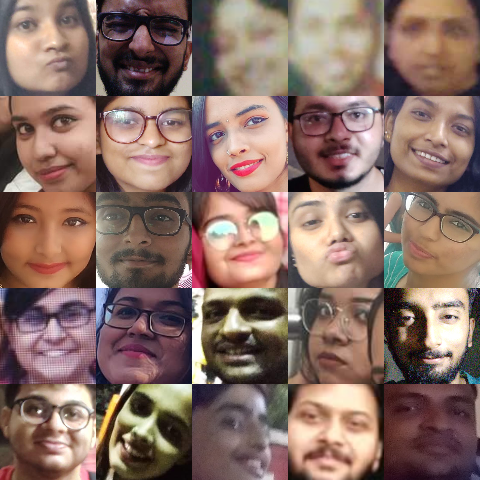

[INFO] faces for face ID 0


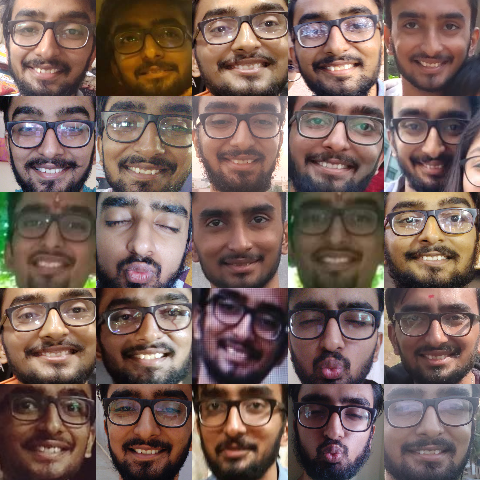

[INFO] faces for face ID 1


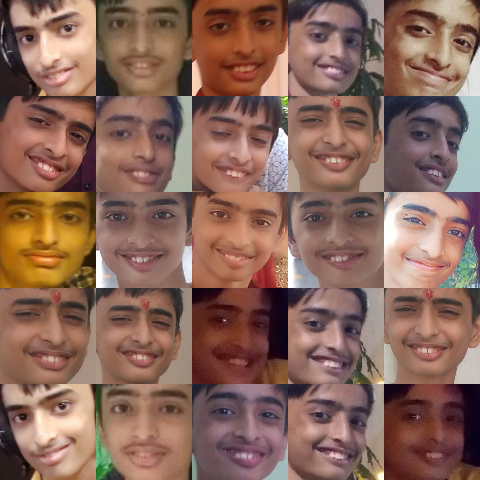

[INFO] faces for face ID 2


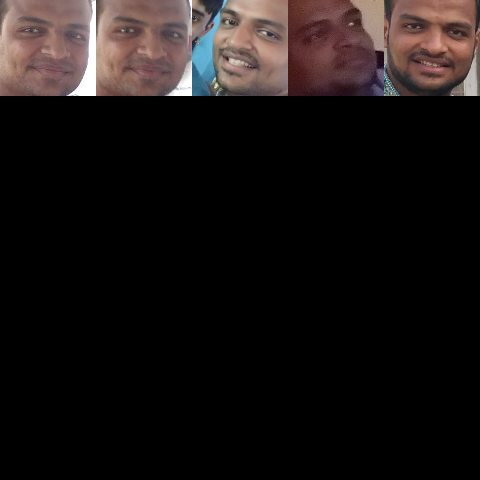

[INFO] faces for face ID 3


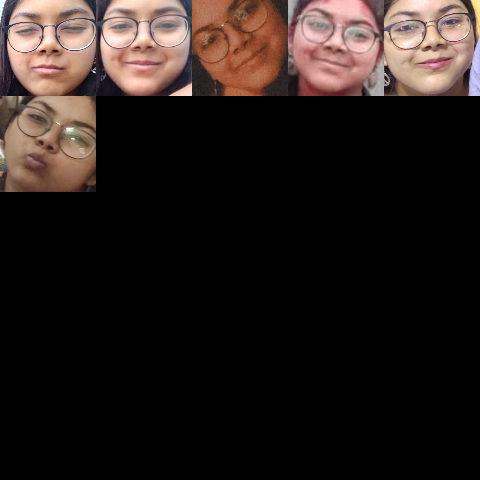

In [233]:
for labelID in labelIDs:
  print(f'[INFO] faces for face ID {labelID}')
  idxs = np.where(clt.labels_ == labelID)[0]
  idxs = np.random.choice(idxs,size=min(25,len(idxs)),replace=False)
  faces = []
  for i in idxs:
    image = cv2.imread(data[i]['imagePath'])
    (top,right,bottom,left) = data[i]['loc']
    face = image[top:bottom, left:right]
    face = cv2.resize(face, (96,96))
    faces.append(face)
  montage = build_montages(faces,(96,96),(5,5))[0]
  cv2_imshow(montage)

Enter the number of the first cluster of images you want to compare :0
Enter the number of the second cluster of images you want to compare :1


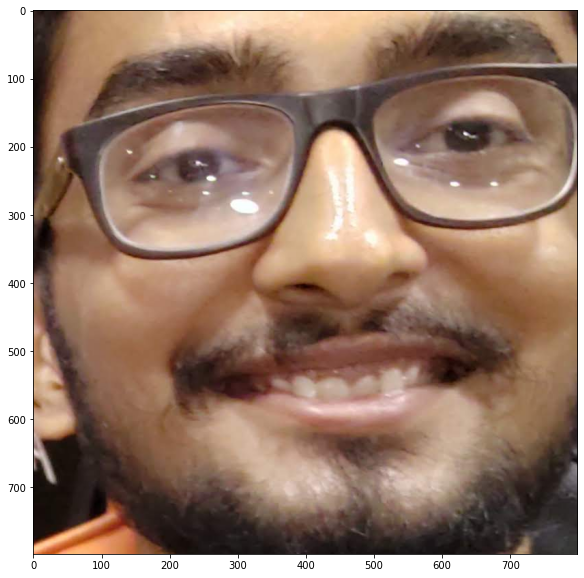

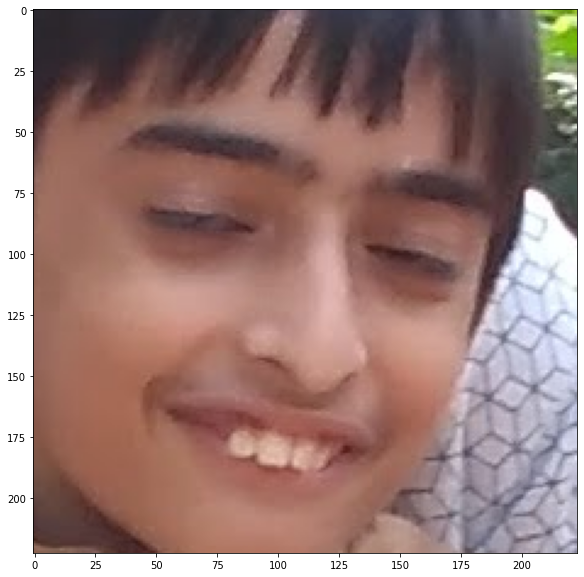

In [247]:
clus1 = int(input('Enter the number of the first cluster of images you want to compare :'))
clus2 = int(input('Enter the number of the second cluster of images you want to compare :'))
face_list1 = clustered_faces[clus1+1]
face_list2 = clustered_faces[clus2+1]
show_picture(face_list1[6]['face'])
show_picture(face_list2[0]['face'])
distance_matrix = np.zeros((len(face_list1),len(face_list2)))
for (i,img1) in enumerate(face_list1[:]):
  for (j,img2) in enumerate(face_list2[:]):
    distance_matrix[i][j] = distance.sqeuclidean(img1['encoding'],img2['encoding'])

In [237]:
def get_score(distance_matrix):
  mean = np.mean(distance_matrix)
  standardized_mean = (mean - distance_matrix.min())/(distance_matrix.max()-distance_matrix.min())
  return 1/(1+standardized_mean)

In [242]:
print(get_score(distance_matrix)*100)

71.0346135199342
